# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Marie Howell

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

## Part 1: Principle Component Analysis (PCA) (18 marks)

In [254]:
# TODO: Import dataset and inspect the first five columns

df = pd.read_csv('seeds_dataset.txt',sep='\t', header=None,  usecols=range(8))
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [255]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

I have selected the standard scaler method for scaling because 

Before we implement the scaler, we need to split the data into training and testing sets first.

In [256]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=0)

In [257]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(168, 7)
(168,)


Now that we have our training data, we can implement our selected scaler.

In [258]:
# TODO: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [259]:
# TODO: Instantiate model
model = LogisticRegression(max_iter=2000)


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [260]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [261]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
grid_lr = GridSearchCV(model, param_grid, cv=5)
grid_lr.fit(X_train_scaled, y_train)

print("logistical regression best estimator: ")
print(str(grid_lr.best_estimator_) + "\n")
print("logistical regression best parameters: ")
print(str(grid_lr.best_params_) + "\n")
print(f'Cross-Validation accuracy {grid_lr.best_score_:.2f}')
print(f'Test accuracy {grid_lr.score(X_test_scaled, y_test):.2f}\n')

logistical regression best estimator: 
LogisticRegression(C=10.0, max_iter=2000)

logistical regression best parameters: 
{'C': 10.0, 'fit_intercept': True}

Cross-Validation accuracy 0.95
Test accuracy 0.95



### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [262]:
# TODO: Predict y labels using best estimator
model = LogisticRegression(C=10.0, max_iter=2000)
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)


In [263]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_test_scaled)
print(X_test_scaled.shape)
print(projected.shape)

(42, 7)
(42, 2)


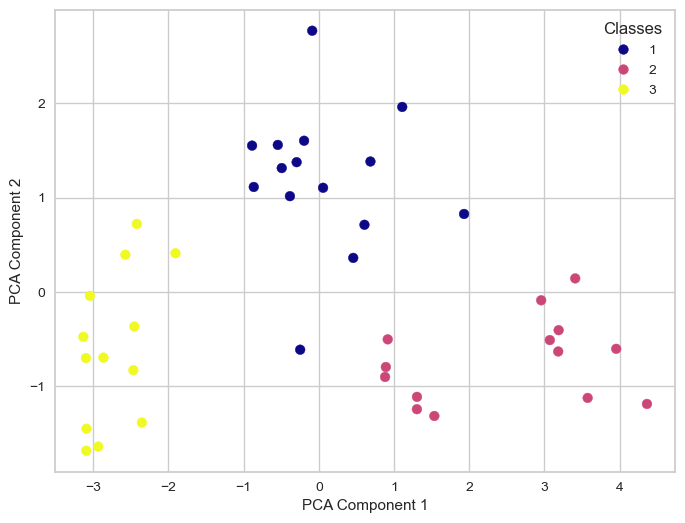

In [264]:
# TODO: Plot test points colored by predicted label

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected[:, 0], projected[:, 1], c=y_pred, cmap='plasma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*
1. The logistical regression model did work well on this data set with cross-validation accuracy of 0.95 and test accuracy 0.95. This is also indicated in the graph classes have more a less been plotted in corresponding groups.
2. PCA also seemed to work well. The 2-dimensional data produced a graph with 3 distinct classes with not very much overlap.



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code from the lecture examples and the lab activities. 
2. I completed the steps in the order that is laid out. 
3. I did not use any AI tool. 
4. I found it a little challenging to implement the PCA process but looking at the lecture examples and the labs helped me figure it out. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [265]:
# TODO: Scale feature matrix
df_scaled = df.iloc[:,:-1]

scaler = StandardScaler()
scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(scaler.transform(df_scaled))
df_scaled


,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

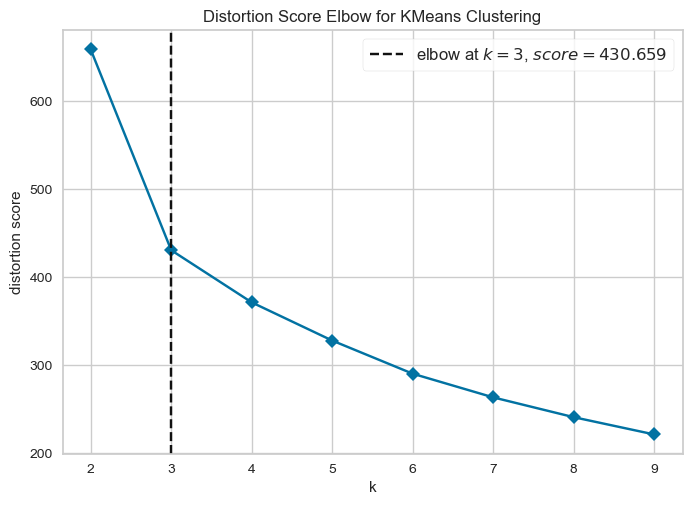

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [266]:
# TODO: Use the elbow method to determine the optimal number of clusters
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [267]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(df_scaled)

c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [268]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = kmeans.labels_

silhouette = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {silhouette}")

calinski_harabasz = calinski_harabasz_score(df_scaled, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(df_scaled, labels)
print(f"Davies-Bouldin Score: {davies_bouldin}")


Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.78417491616472
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

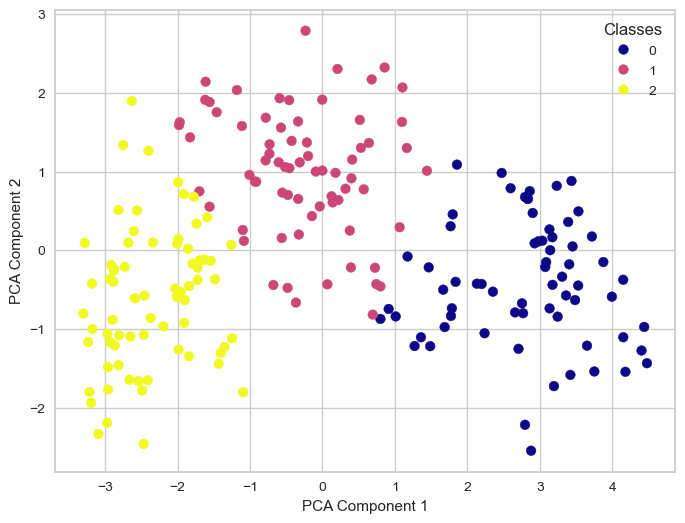

In [269]:
# TODO: Plot clustering results
# centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled.columns)
# centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
# centers


pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected[:, 0], projected[:, 1], c=labels, cmap='plasma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [270]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA()

# Fit the model to the scaled data
pca_result = pca.fit_transform(df_scaled)

# Calculate the explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [271]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df_scaled)

In [272]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(pca_data)

c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marie\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [275]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = kmeans.labels_

print(f"Number of components: {n_components}")

silhouette_pca = silhouette_score(pca_data, labels)
print(f"Silhouette Score: {silhouette_pca}")

calinski_harabasz_pca = calinski_harabasz_score(pca_data, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_pca}")

davies_bouldin_pca = davies_bouldin_score(pca_data, labels)
print(f"Davies-Bouldin Score: {davies_bouldin_pca}")


Number of components: 3
Silhouette Score: 0.40885331976036965
Calinski-Harabasz Score: 260.20226181768214
Davies-Bouldin Score: 0.905664368017185


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [274]:
# TODO: Display results
silhouette_scores = [silhouette,silhouette_pca]
calinski_harabasz_scores = [calinski_harabasz,calinski_harabasz_pca]
davies_bouldin_scores = [davies_bouldin,davies_bouldin_pca]

results = pd.DataFrame(columns=["silhouette score", "calinski harabasz score", "davies bouldin score"], index=['Kmeans without PCA','Kmeans with PCA'])
results["silhouette score"] = silhouette_scores
results['calinski harabasz score'] = calinski_harabasz_scores
results['davies bouldin score'] = davies_bouldin_scores
results

,silhouette score,calinski harabasz score,davies bouldin score
Kmeans without PCA,0.400727,249.784175,0.927871
Kmeans with PCA,0.408853,260.202262,0.905664


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. The optimal number of clusters determined by the elbow method makes sense for this data set because in the first part when we were evaluating using classification, we had 3 classes. The 3 clusters represent the 3 classes. 
2. The results are somewhat similar. the classes in part 1 are concentrated in similar areas to the clusters in part 2. But the graph in part 2 has a lot more data points since the whole data set was used instead of only the test data. 
3. three components were used for PCA. The silhouette score was slightly improved when PCA was applied, indicating that there was a small improvement in how well the data matched its own cluster and how poorly it matched neighbouring clusters. The calinski harabasz score was also a bit higher, indicating that there was an improvement in the definition and distinctness of the clusters. The davies bouldin score was slightly lower when PCA was used, indicating an improvement of the separation of clusters. All three metrics showed small improvements when PCA analysis was used. 


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code from the lecture examples and the lab activities. 
2. I completed the steps in the order that is laid out. 
3. I used chat gpt to quickly double check my understanding of some concepts. 
4. After using PCA in part 1 I didn't find anything particularly challenging. 


## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I found it interesting working with a supervised model and then a unsupervised model on the same data set. I thought it was an interesting contrast and help me understand the difference better. 